## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palettes

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [5]:
column_names = ['DATE', 'TAG', 'POSTS']
df = pd.read_csv('QueryResults.csv', names=column_names, header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [6]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


In [7]:
df.tail()

,DATE,TAG,POSTS
2588,2024-02-01 00:00:00,php,1367
2589,2024-02-01 00:00:00,python,8114
2590,2024-02-01 00:00:00,r,1839
2591,2024-02-01 00:00:00,ruby,157
2592,2024-02-01 00:00:00,swift,688


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [8]:
df.shape
# to see each column name use
# df.column

(2593, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [9]:
df.count()

DATE     2593
TAG      2593
POSTS    2593
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [10]:
lang_sum = df.groupby('TAG').sum().sort_values('POSTS', ascending=False)
lang_sum["POSTS"]

TAG
javascript    2523069
python        2182922
java          1913593
c#            1611877
php           1462582
c++            804918
r              503642
c              403021
swift          332515
ruby           228894
go              72402
perl            68045
delphi          51734
assembly        44036
Name: POSTS, dtype: int64

In [11]:
pd.options.display.float_format = '{:,.2f}'.format # format numbers to have , and .

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [12]:
months_per_data = df.groupby('TAG').count().sort_values('DATE', ascending = False)
months_per_data

,DATE,POSTS
TAG,,
c#,188,188
assembly,187,187
c,187,187
c++,187,187
delphi,187,187
java,187,187
javascript,187,187
perl,187,187
php,187,187


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [13]:
df["DATE"][1]
df.DATE[1] # for column names no spaces, we can also use the dot-notation

'2008-08-01 00:00:00'

In [14]:
type(df["DATE"][1])

str

In [15]:
df.DATE = pd.to_datetime(df["DATE"])
print(type(df.DATE[1]))
df.DATE

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
2588   2024-02-01
2589   2024-02-01
2590   2024-02-01
2591   2024-02-01
2592   2024-02-01
Name: DATE, Length: 2593, dtype: datetime64[ns]

## Data Manipulation



In [16]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [17]:
test_df.shape
test_df.columns
test_df.head(10)

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [18]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [19]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.00,83.00,504.00,164.00,14.00,NaN,222.00,163.00,28.00,157.00,119.00,NaN,70.00,NaN
2008-09-01,28.00,320.00,"1,639.00",755.00,104.00,NaN,"1,129.00",634.00,130.00,474.00,537.00,6.00,286.00,NaN
2008-10-01,16.00,303.00,"1,987.00",807.00,112.00,NaN,"1,149.00",722.00,128.00,604.00,506.00,NaN,247.00,NaN
2008-11-01,16.00,258.00,"1,729.00",734.00,140.00,NaN,954.00,580.00,97.00,497.00,448.00,1.00,157.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,172.00,970.00,"3,184.00","1,708.00",165.00,421.00,"3,418.00","5,452.00",53.00,"1,538.00","8,998.00","2,063.00",193.00,901.00
2023-11-01,172.00,959.00,"3,109.00","1,469.00",103.00,409.00,"3,275.00","5,186.00",44.00,"1,399.00","8,460.00","1,994.00",153.00,864.00
2023-12-01,181.00,876.00,"2,645.00","1,429.00",75.00,326.00,"2,538.00","4,772.00",53.00,"1,208.00","7,002.00","1,603.00",154.00,742.00


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [20]:
print(reshaped_df.shape)
reshaped_df.columns

(188, 14)


Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [21]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.00,83.00,504.00,164.00,14.00,NaN,222.00,163.00,28.00,157.00,119.00,NaN,70.00,NaN
2008-09-01,28.00,320.00,"1,639.00",755.00,104.00,NaN,"1,129.00",634.00,130.00,474.00,537.00,6.00,286.00,NaN
2008-10-01,16.00,303.00,"1,987.00",807.00,112.00,NaN,"1,149.00",722.00,128.00,604.00,506.00,NaN,247.00,NaN
2008-11-01,16.00,258.00,"1,729.00",734.00,140.00,NaN,954.00,580.00,97.00,497.00,448.00,1.00,157.00,NaN


In [22]:
reshaped_df.fillna(0, inplace=True) # inplace argument means that we are updating reshaped_df, replacing NaN with 0....answer: plot y using x as index array
print(reshaped_df.isna().values.any()) # searching untill we get first NaN, then would print be True. We only need to find first NaN to get True with this value.any(), otherwise if we use isna() then we would look whole DataFrame table that can be time consuming
reshaped_df.count()

False


TAG
assembly      188
c             188
c#            188
c++           188
delphi        188
go            188
java          188
javascript    188
perl          188
php           188
python        188
r             188
ruby          188
swift         188
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

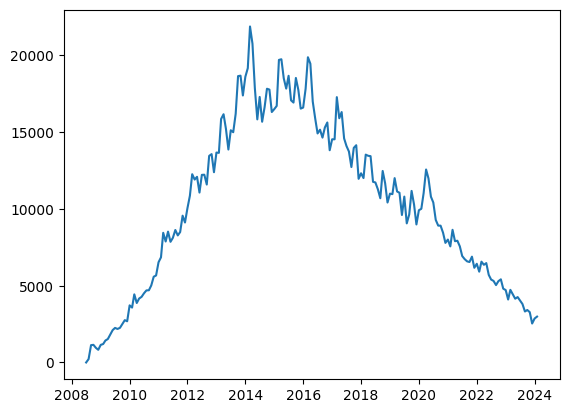

In [23]:
#plt.plot(reshaped_df["java"]) # you don have to use here x coordinates, i dont know why!!!!
plt.plot(reshaped_df.index, reshaped_df['java']) # x are values of DATE, y are the number of POSTS

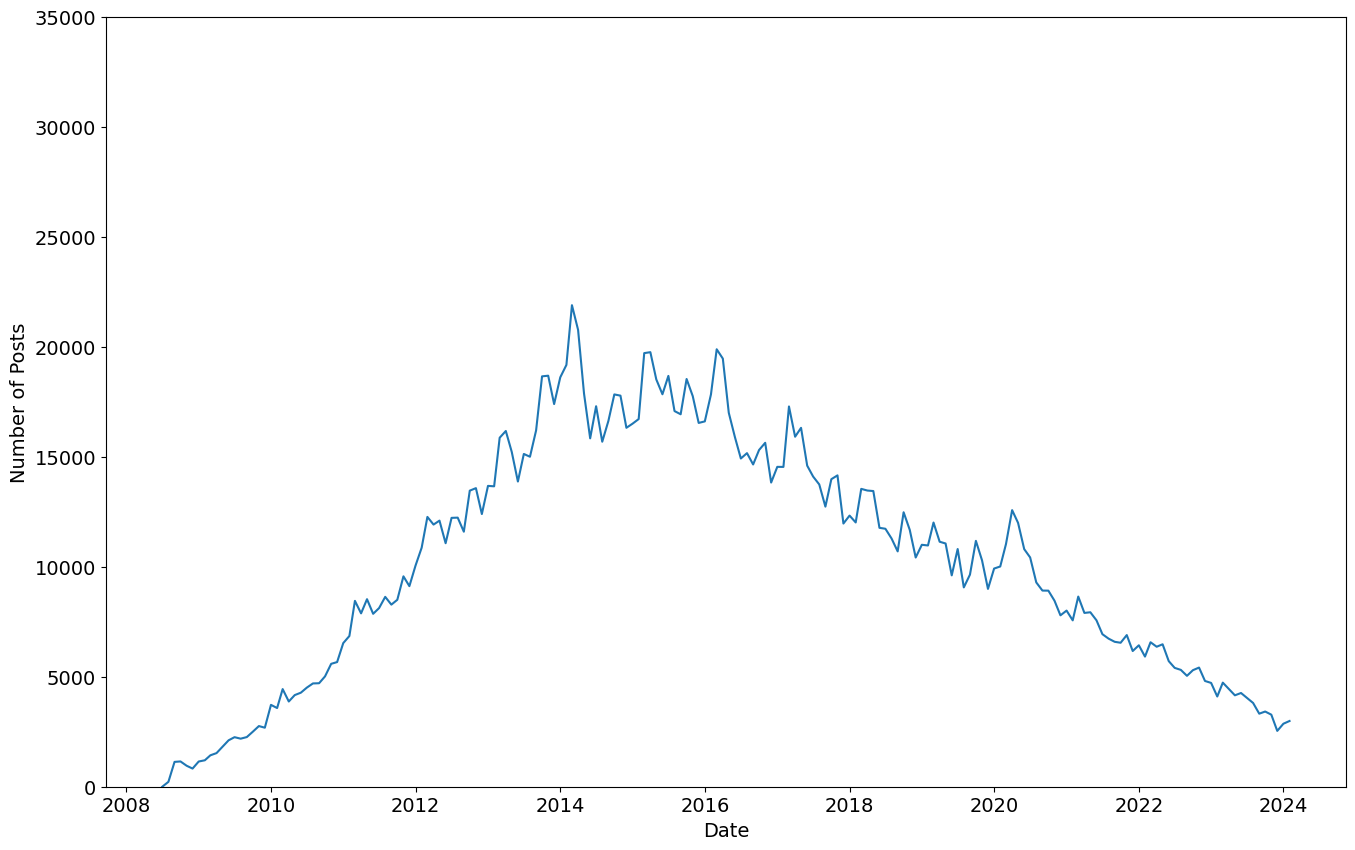

In [24]:
plt.figure(figsize=(16,10)) #  width (16) and a height (10)
plt.yticks(fontsize=14) # increase the fontsize of the ticks
plt.xticks(fontsize=14) # increase the fontsize of the ticks
plt.xlabel('Date', fontsize=14) # x labels
plt.ylabel('Number of Posts', fontsize=14) # y labels
plt.ylim(0, 35000) # lower limit of 0 for the y-axis with, and maximum of 35000
plt.plot(reshaped_df.index, reshaped_df['java']) # x are values of DATE, y are the number of POSTS

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

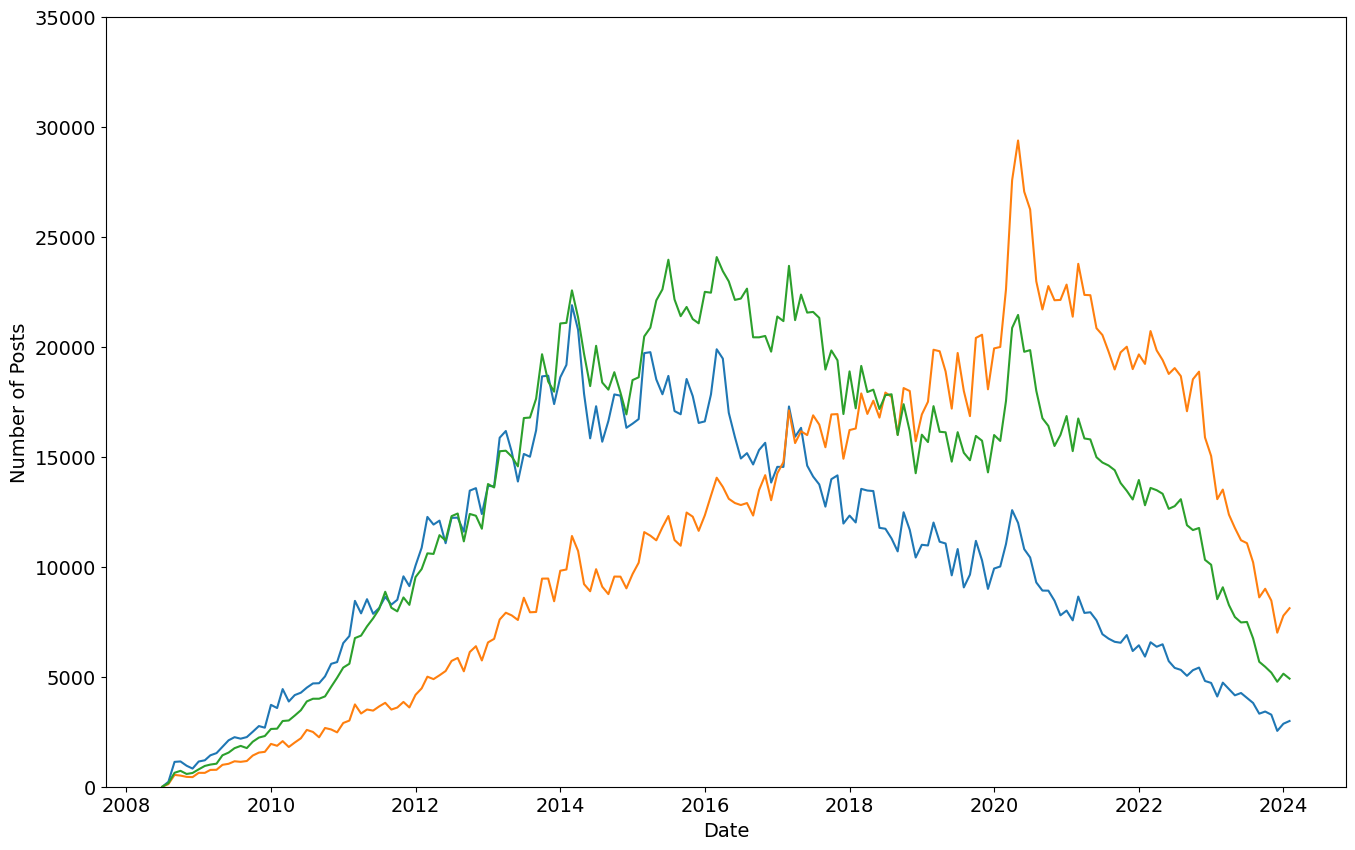

In [25]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])
plt.plot(reshaped_df.index, reshaped_df['javascript'])

**Challenge**: Show all data on the same chart.

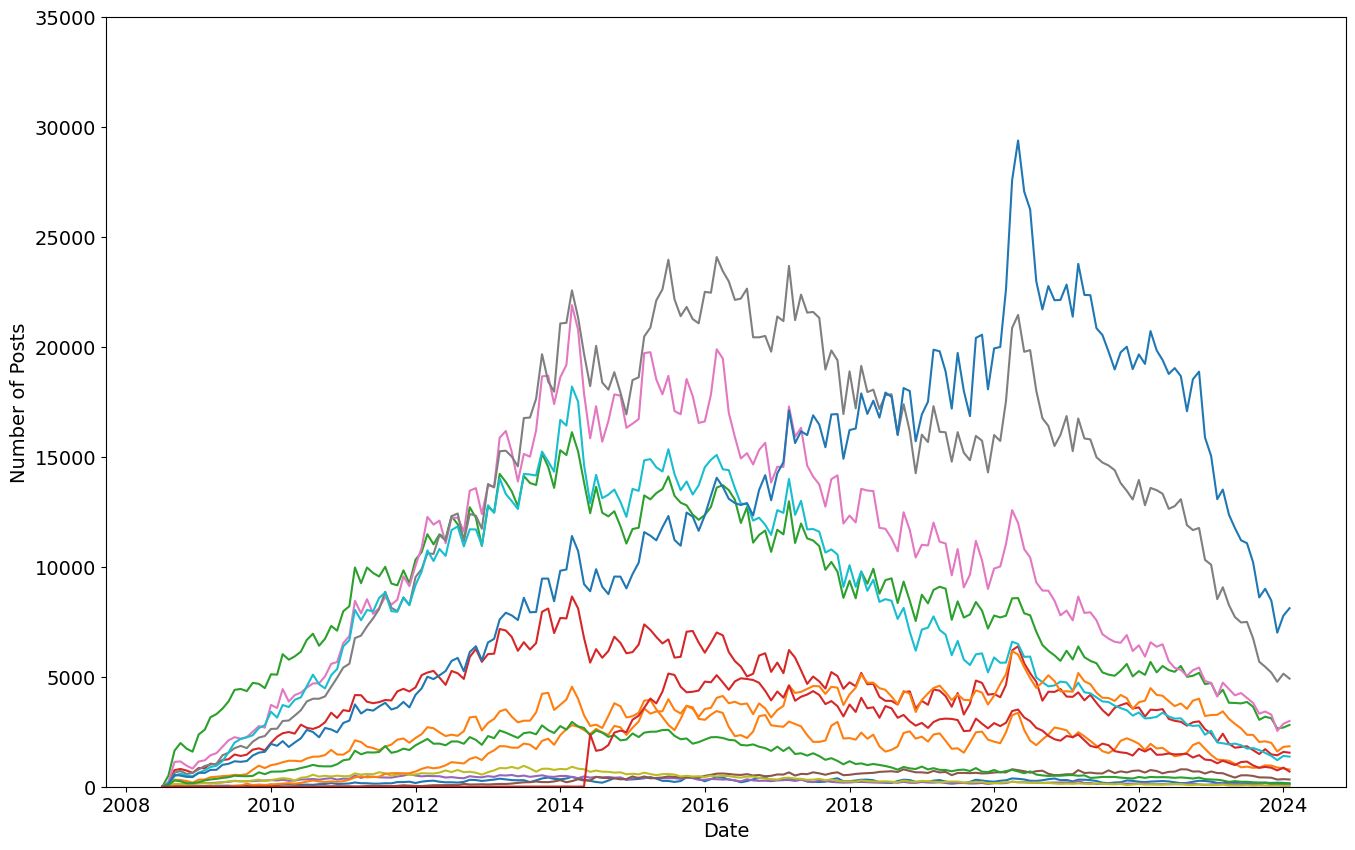

In [26]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])


**Challenge**: Add a label for each line based on the column name (and make the lines thicker at the same time using linewidth)

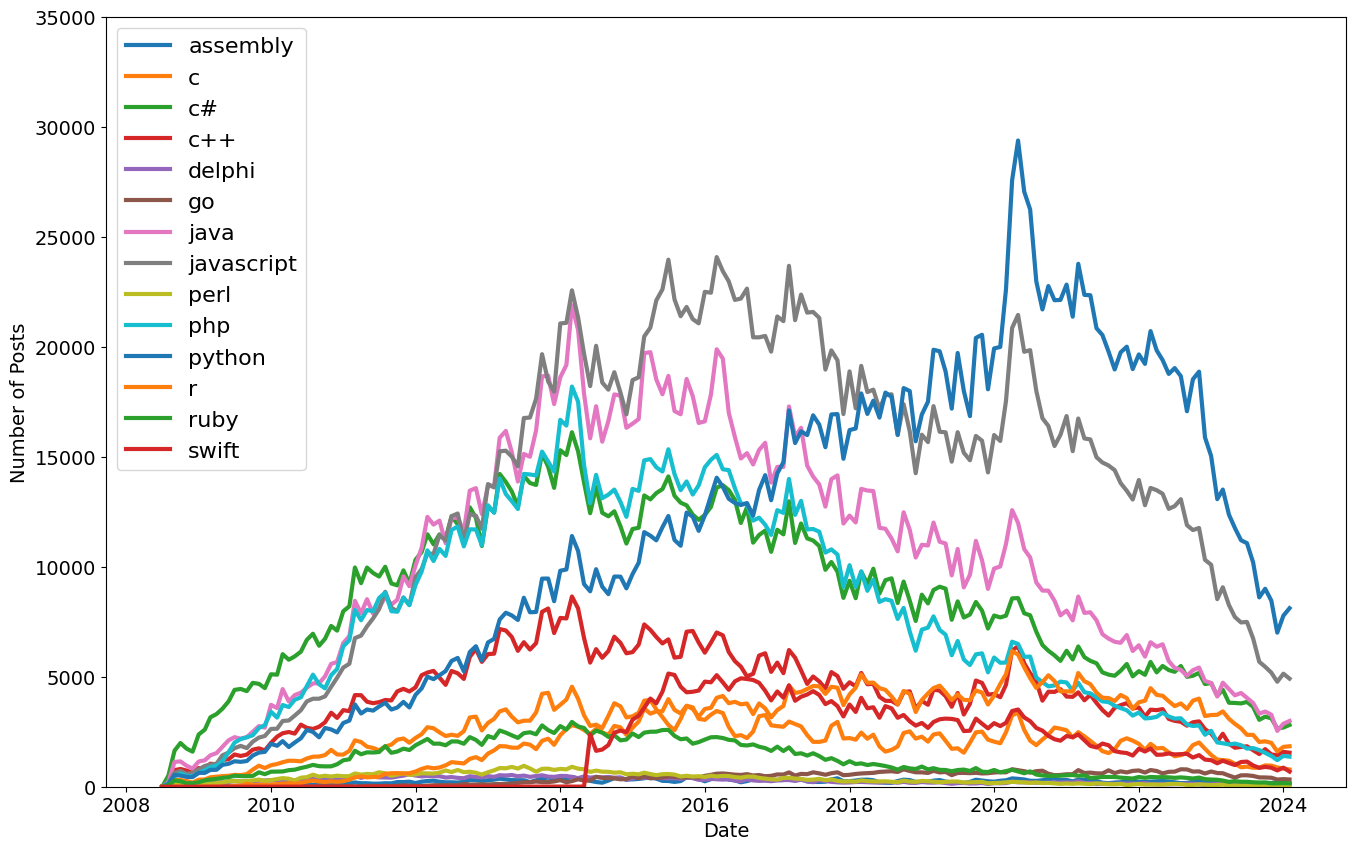

In [27]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

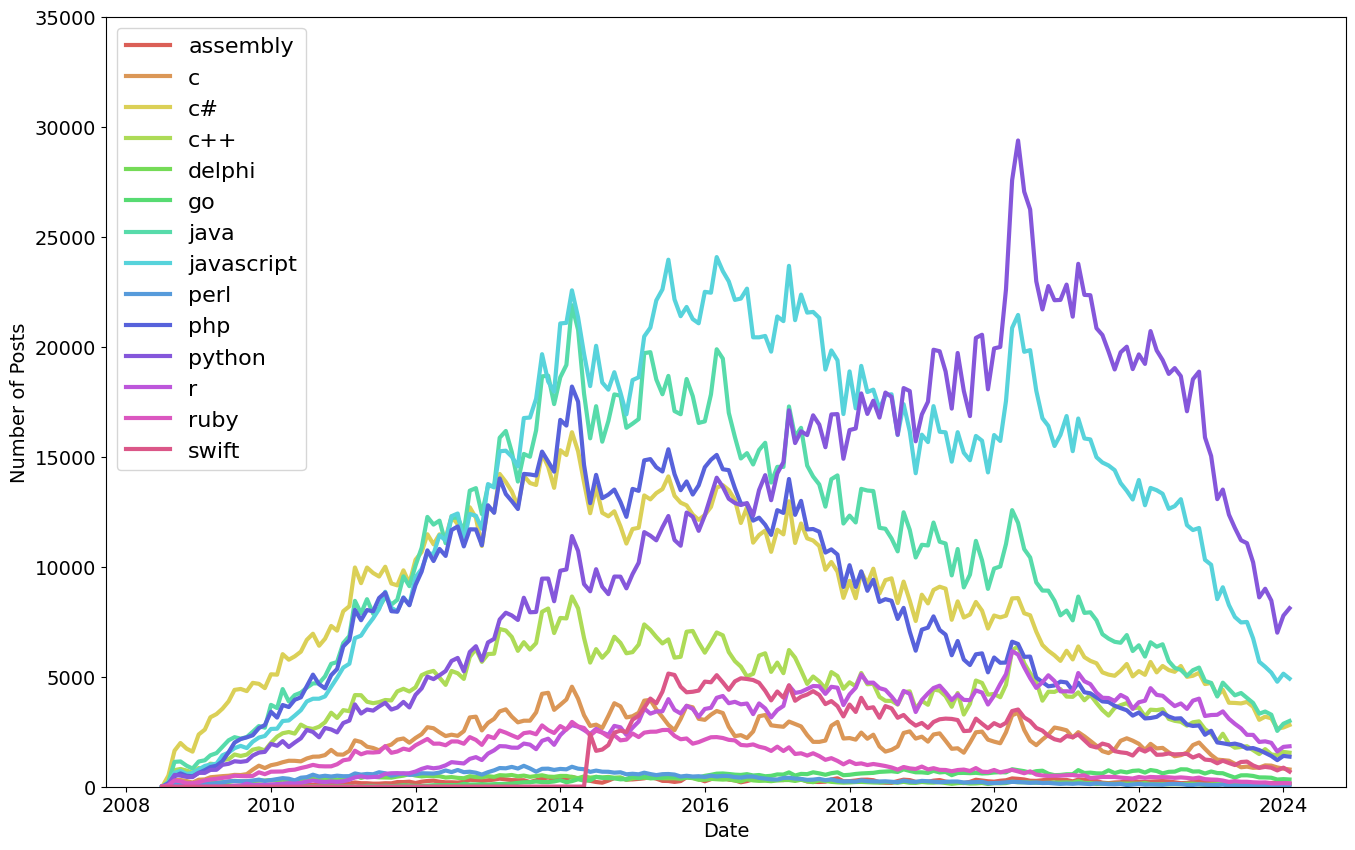

In [45]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Define a color palette with enough colors for each column
colors = sns.color_palette('hls', n_colors=len(reshaped_df.columns))

for i, column in enumerate(reshaped_df.columns):
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=column, color=colors[i])

plt.legend(fontsize=16)
plt.show()


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

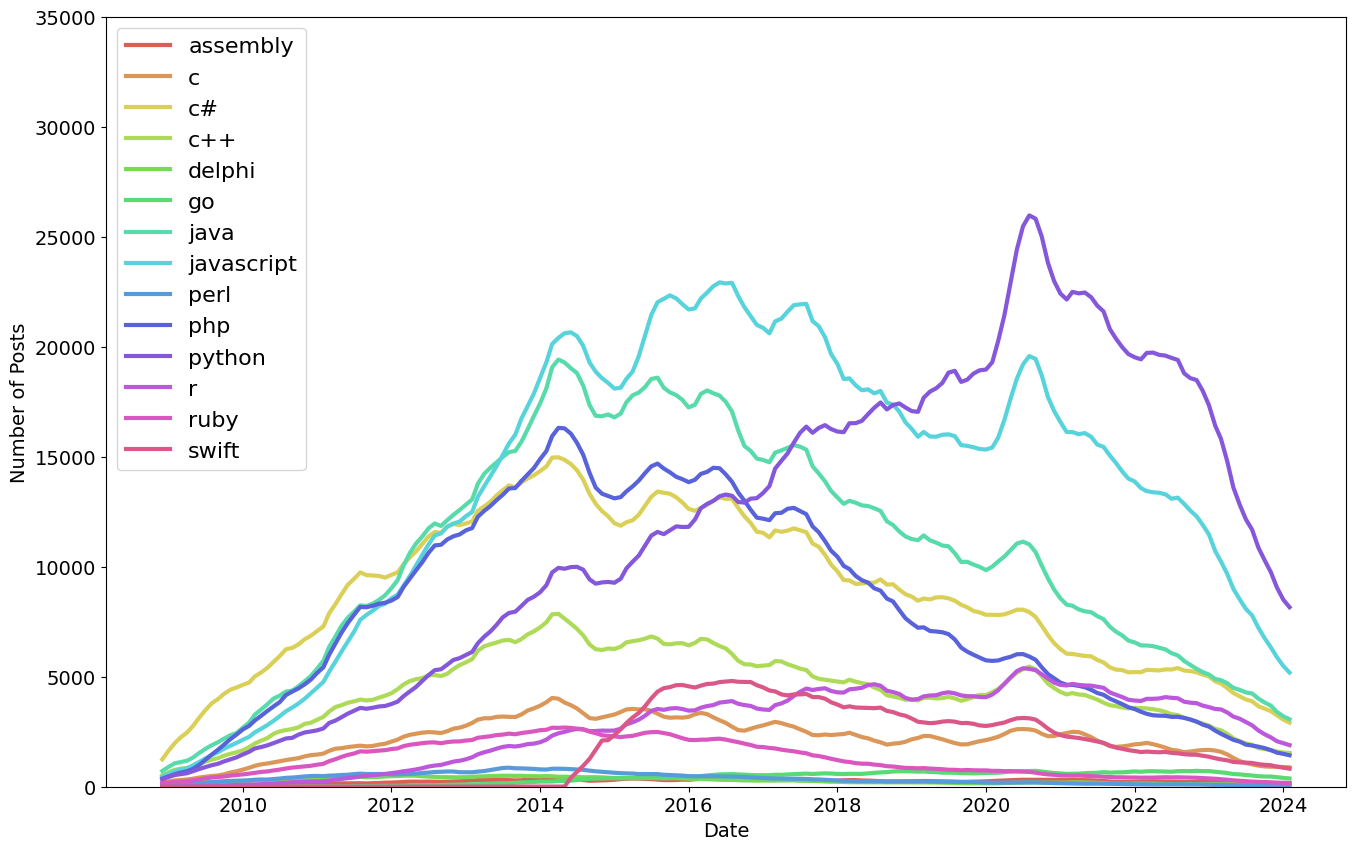

In [50]:
# The window is number of observations that are averaged, experiment with window 3,6,12
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# Define a color palette with enough colors for each column
colors = sns.color_palette('hls', n_colors=len(reshaped_df.columns))

# # plot the roll_df instead with basic color palette
# for column in roll_df.columns:
#     plt.plot(roll_df.index, roll_df[column], 
#              linewidth=3, label=roll_df[column].name)
    
# plot with sns color palette
for i, column in enumerate(roll_df.columns):
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name, color=colors[i])
 
plt.legend(fontsize=16)

Looking at the data, what was the most popular programming language from 2008 to 2012 by the number of posts?

In [61]:
# Filter the DataFrame for the years 2008 to 2012
filtered_df_08_12 = df[(df['DATE'].dt.year >= 2008) & (df['DATE'].dt.year <= 2012)]

# Group by programming language ('TAG') and sum the number of posts
lang_sum_08_12 = filtered_df_08_12.groupby('TAG').count()
print(f"The most popular programmin language from 2008 to 2012 by the number of posts was: {lang_sum_08_12.sort_values('POSTS', ascending = False).index[0]}")
lang_sum_08_12.sort_values('POSTS', ascending = False)

The most popular programmin language from 2008 to 2012 by the number of posts was: c#


,DATE,POSTS
TAG,,
c#,54,54
assembly,53,53
c,53,53
c++,53,53
delphi,53,53
java,53,53
javascript,53,53
perl,53,53
php,53,53


What was the most popular programming language from 2015 to 2018?

In [66]:
filtered_df_15_18 = df[(df['DATE'].dt.year >= 2015) & (df["DATE"].dt.year <= 2018)]
lang_sum_15_18 = filtered_df_15_18.groupby('TAG')['POSTS'].sum()  # Selecting only the 'POSTS' column
print(f"The most popular programming language from 2015 to 2018 by the number of posts was: {lang_sum_15_18.idxmax()}")
lang_sum_15_18.sort_values(ascending=False)

The most popular programming language from 2015 to 2018 by the number of posts was: javascript


TAG
javascript    975392
java          729360
python        691074
php           571728
c#            541799
c++           264203
swift         194999
r             187692
c             130287
ruby           80606
go             26508
perl           18649
assembly       14679
delphi         13703
Name: POSTS, dtype: int64